In [4]:
# !pip install geocoder
import tweepy

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler 
from tweepy import Stream
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Secret Credentials 
ACCESS_TOKEN = "500435442-ZsyX0WGAgAsiK3mPMwCLVZgXaM4mPeLpOZHh46Uc"
ACCESS_TOKEN_SECRET = "tI6pbzVsXWzNmfUEC07by6ZpJc5d58vu0sKxovxuDQEoY"
CONSUMER_KEY = "zazEfoGYmcJp8IZCQZYeleORe"
CONSUMER_SECRET = "JtTfz6C4WaCNZkzmn02U4GkOoilCyiIVKFFknuLgWD51MeVySm"

In [6]:
auth=OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)
api=tweepy.API(auth)

In [4]:
tweets=[]
retweet=[]
likes=[]

In [5]:
#input from website 
user_input='CA'
userx=['SkyNews','ABC','9NewsMelb','dailytelegraph']

In [44]:
# a=tweepy.Cursor(api.user_timeline,id=userx).items(200)
# a=list(a)
data=[]
for i in range(len(userx)):
    searched_tweets = [status for status in tweepy.Cursor(api.user_timeline,id=userx[i]).items(200)]
    tweets=[]
    for i in searched_tweets:
        tweets.append(i.text)
    data.append(tweets)
    

In [1]:

# a=tweepy.Cursor(api.user_timeline,id=userx).items(200)
# a=list(a)
# a

In [2]:
# data

In [7]:
# Twitter_df2=pd.DataFrame({'tweets':tweets,'likes':likes,'retweet':retweet})
# Twitter_df2

In [8]:



#LOAD MODEL
loaded_vec = CountVectorizer(vocabulary=pickle.load(open("count_vector.pkl", "rb")))
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("NEW_softmax.pkl","rb"))




In [9]:
news_category=[]

In [10]:
for i in range(len(data)):
    for j in range(len(data[i])):
        X_new_counts = loaded_vec.transform([data[i][j]])
        X_new_tfidf = loaded_tfidf.transform(X_new_counts)
        predicted = loaded_model.predict(X_new_tfidf)
        news_category.append(predicted)





In [11]:
from itertools import islice

def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)), ())



In [12]:
x=[]
for i in range(len(news_category)):
    x.append(news_category[i][0])
    
cumulative_count=[]
set_x=list(set(x))

for j in range(len(set_x)):
    cumulative_count.append(x.count(set_x[j]))


# c1=x[0:200]
# c2=x[200:400]
# c3=x[400:600]

In [13]:
import numpy as np 
N_c=list(chunk(x, 200))


In [14]:
# set_x=list(set(x))
# set_x_count1=[]
# set_x_count2=[]
# set_x_count3=[]

In [15]:
count_y=[]

for i in range(len(N_c)):
    count=[]
    for j in range(len(set_x)):
        count.append(N_c[i].count(set_x[j]))
    count_y.append(count)

In [16]:
# list1=[]
# for i in range(len(count_y)):
#     list1.append([userx[i],count_y[i]])
# df=pd.DataFrame(list1,columns=['Name','Values'])

In [17]:
# Tweet_Uni=dict(zip(set_x,set_x_count))
# count1=list(Tweet_Uni.values())
# size1=[]
# for i in count1:
#     size1.append(i)

# colours=[]
# c=120
# for i in range(len(count1)):
#     c=c+2
#     colours.append(c)



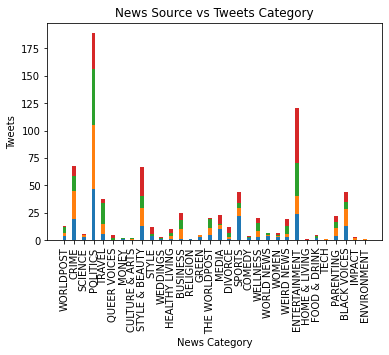

In [18]:
w=0.4

for i in range(len(count_y)):
    plt.bar(set_x, count_y[i],w,bottom = np.sum(count_y[:i], axis = 0))
    plt.xlabel('News Category')
    plt.ylabel('Tweets')
    plt.title('News Source vs Tweets Category')
    plt.xticks(rotation=90)
plt.show()

In [19]:
# import matplotlib.pyplot as plt


# plt.bar(set_x,count_y[0],w)
# plt.bar(set_x,count_y[1],w,bottom=count_y[0])
# plt.bar(set_x,count_y[2],w,bottom=count_y[0])

# plt.xlabel('News Category')
# plt.ylabel('Tweets')
# plt.title('News Source vs Tweets Category')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

No handles with labels found to put in legend.


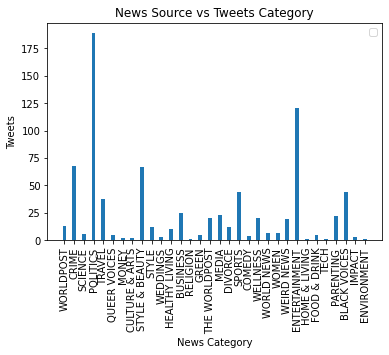

In [20]:
plt.bar(set_x,cumulative_count,w)
plt.xlabel('News Category')
plt.ylabel('Tweets')
plt.title('News Source vs Tweets Category')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [21]:
# # !pip install plotly
# import plotly.graph_objects as go

# fig1 = go.Figure(data=[go.Scatter(
#     x=set_x,
#     y=cumulative_count,
#     mode='markers',
#     marker=dict(
#         color=colours,
#         size=size1,
#         showscale=True
#         )
# )])
# fig1.show()

# bar1=[set_x,set_x_count]

In [22]:
# # !pip install plotly
# import plotly.graph_objects as go

# fig2 = go.Figure(data=[go.Scatter(
#     x=set_x,
#     y=set_x_count,
#     mode='markers',
#     marker=dict(
#         color=colours,
#         size=size1,
#         showscale=True
#         )
# )])
# fig2.show()

# bar2=[set_x,set_x_count]

In [23]:
# # !pip install seaborn
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as figure
# df1=pd.DataFrame({'x':bar1[0],'y':bar1[1]})
# df2=pd.DataFrame({'x':bar2[0],'y':bar2[1]})

# df1['hue']='Skynews'
# df2['hue']='ABC'

# combined=pd.concat([df1,df2])

# a4_dims = (11.7, 8.27)
# fig, ax = plt.subplots(figsize=a4_dims)
# g=sns.barplot(ax=ax,x='x',y='y',data=combined,hue='hue')
# plt.setp(g.get_xticklabels(), rotation=90)
# plt.show()


In [24]:
# figx.show()

In [25]:
# !pip install -U kaleido
# !conda install psutil

In [26]:
# fig.write_image("yourfile.png") 

In [27]:
import json
data = {}
df=pd.DataFrame()
df['category']=set_x

if user_input=='CA':
    data=dict(zip(set_x,cumulative_count))
    json_data = json.dumps(data)
else:
    for i in range(len(count_y)):
        df['value_'+format(i)]=count_y[i]
    json_data=df.to_json(orient='records', lines=True)




In [28]:
# for i in range(len(count_y)):
#     data=dict(zip(set_x,count_y[i]))


In [29]:
# df=pd.DataFrame()
# df['category']=set_x
# df['cat_'+format(i)]=count_y[0]
# df

In [30]:
# # import matplotlib.pyplot as plt
# # plt.scatter(set_x, set_x_count, s=size1,c=colours

# i=1
# s='cat_'+format({i})
# s

In [31]:
# plt.to_json('json_file.json')

In [32]:
# plt.scatter(
#     x = set_x, 
#     y = set_x_count, 
#     s=size1, 
#     c=colours, 
#     cmap="Accent", 
#     alpha=0.6, 
#     edgecolors="white", 
#     linewidth=2);
 
# plt.xlabel("News Category")
# plt.ylabel("Frequency")
# plt.title("TWITTER ANALYSIS")
# plt.ylim(0,200)



In [33]:
# plt.savefig(fname='fig2.png')


### NEW EXPLORATION -- whats trending

In [119]:
import sys
import geocoder
# Available Locations
places = api.geo_search(query="AUSTRALIA", granularity="country")
place_id = places[0].id

available_loc = api.trends_available()
    # Trends for Specific Country
loc = sys.argv[1]     # location as argument variable 
g.lat=-37.8136
g.lng=144.9631
closest_loc = api.trends_closest(g.lat, g.lng)
trends = api.trends_place(closest_loc[0]['woeid'])


In [120]:
trends2=trends[0]['trends'][:10]
d={}
for i in range(len(trends2)):
    print('####################################')
    string="#"+str(trends2[i]['name'])
    print(string)
    
    popular_tweets=[]
    popular_tweets = api.search(q=trends2[i]['name'], result_type='popular')
    for j in range(len(popular_tweets)):
        print("\n"+popular_tweets[j].text)
        print("\nBy--  "+popular_tweets[j].user.name)
#        l=[cat("\n"+popular_tweets[j].text,"\nBy--  "+popular_tweets[j].user.name,'RetweetCount:'+popular_tweets[j].ret]

    print('----------------------------------------------------')


####################################
##NFLDraft2021

One of the biggest days of my life. Had to start with a fresh cut to get my mind and look right. RT if you want you… https://t.co/ckctn004Tv

By--  DeVonta Smith

Had to make time to hang with a true 🏈 🐐 @DesmondHoward #NFLDraft2021 @Verizon https://t.co/LrkCTEJLb5

By--  DeVonta Smith

YOO #NFLDraft2021 is finally here! Who do you think @hbomax's top pick will be? #FinishInfinityTrain https://t.co/48Qt8367Kg

By--  Sam Spina

FINALLY. Let’s build some football TEAMS tonight !!!#NFLDraft2021

By--  Louis Riddick

FYI #NFLDraft2021 https://t.co/8WTvgLjZe5

By--  McNeil

IT’S FINALLY HERE #NFLDraft2021 https://t.co/THI0V6oh6C

By--  Cincinnati Bengals

A day this big has to start in the gym 👀 @verizon #NFLDraft2021 #VerizonPartner https://t.co/vxjLWPkZZu

By--  Zachary Wilson

With the No. 3 overall pick in the 2021 NFL Draft, the 49ers select QB Trey Lance, North Dakota State

#NFLDraft2021 https://t.co/6BzaClimAm

By--  PFF

In 1968,


NFL news from @AdamSchefter today:

🤯 Aaron Rodgers may want out of Green Bay
🤯 Tim Tebow requested a tryout as a T… https://t.co/ZrYS28cX8w

By--  SportsCenter

‘twas the night before draft
and all through the league
all the mock drafts
were causing fatigue

time to add new g… https://t.co/iIoQpmJL92

By--  Washington Football Team

Thank you to everyone who supports the Jacksonville @Jaguars! Whether you’ve been a Jags fan through thick &amp; thin s… https://t.co/sUHCr9GlEe

By--  Tony Khan

The Jags are on the clock as Urban Meyer's staff explains to him why he can't take 8 of the top 10 players on his board.

By--  Ari Wasserman

Jags new look offense 👀 https://t.co/oQ8BQEuJyD

By--  B/R Gridiron

I need to have a live cam on Roberta or at least to have her anounce the Jags first overall pick https://t.co/m3pBaVM1bh

By--  PFTCommenter

49ers trying to trade Mac Jones for Aaron Rodgers and Jags trying to sign Tim Tebow to catch passes from Trevor Law… https://t.co/Vv1c7LJrRT

By--


With the No. 2 overall pick in the 2021 @NFLDraft, the @nyjets select QB Zach Wilson.

📺: 2021 #NFLDraft on NFLN/ES… https://t.co/eqzsCip6i3

By--  NFL

Jets take BYU QB Zach Wilson.

And now, the 2021 NFL Draft is underway!

By--  Adam Schefter

Zach Wilson doesn't look a day older than 14. https://t.co/6QQziheGF4

By--  Big Cat

Zach Wilson looks like he's 14.

By--  Skip Bayless

Terrified Zach Wilson Cuts Off Pinky Finger To Get Out Of Draft That Would Ship Him Off To Jets… https://t.co/3YB8bS3gIg

By--  The Onion

Zach Wilson is headed to the Big Apple! 🗽

The Jets get their QB at No. 2 #NFLDraft https://t.co/28kHqJJgPz

By--  SportsCenter

PFF Grade on throws past 1st read since 2019: (min. 60 attempts)

1st - Justin Fields - 90.6
2nd - Zach Wilson - 90… https://t.co/BFScncT4oA

By--  PFF

Zach Wilson is heading to New York! @nyjets 

📺: 2021 #NFLDraft on NFLN/ESPN/ABC https://t.co/lvIj8p9yqv

By--  NFL

I'm no draft expert but I feel like Zach Wilson's stock should be plummetin

In [121]:
n=[]
tv=[]
for i in range(len(trends2)):
    n.append("#"+str(trends2[i]['name']))
    if trends2[i]['tweet_volume']==None:
        trends2[i]['tweet_volume']=0
    tv.append(int(trends2[i]['tweet_volume']))
trending_data=dict(zip(n,tv))

No handles with labels found to put in legend.


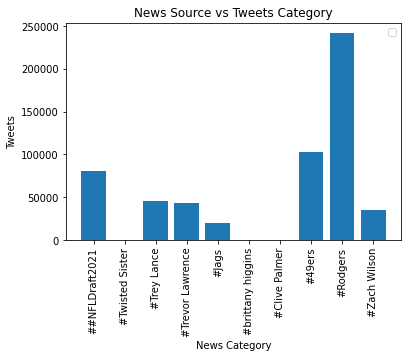

In [122]:
plt.bar(n,tv)
plt.xlabel('News Category')
plt.ylabel('Tweets')
plt.title('News Source vs Tweets Category')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [123]:
count1=tv
size1=[]
for i in count1:
    size1.append(i/1000)

colours=[]
c=120
for i in range(len(count1)):
    c=c+2
    colours.append(c)



In [124]:
# !pip install plotly
import plotly.graph_objects as go

fig1 = go.Figure(data=[go.Scatter(
    x=n,
    y=tv,
    mode='markers',
    marker=dict(
        color=colours,
        size=size1,
        showscale=True
        )
)])
fig1.show()

bar1=[n,tv]

In [ ]:
# # !pip install plotly
# import plotly.graph_objects as go

# fig1 = go.Figure(data=[go.Scatter(
#     x=set_x,
#     y=cumulative_count,
#     mode='markers',
#     marker=dict(
#         color=colours,
#         size=size1,
#         showscale=True
#         )
# )])
# fig1.show()

# bar1=[set_x,set_x_count]

In [128]:
#Export json
import json
trending_data=dict(zip(n,tv))
json_trending_data = json.dumps(trending_data)
